In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari file CSV
data = pd.read_csv('Age _Fossil.csv')

# Melihat dimensi data
print("Dimensi data:", data.shape)

# Melihat nama kolom dan tipe datanya
print("\nNama kolom dan tipe data:\n", data.dtypes)

# Melihat 5 baris pertama data
print("\n5 baris pertama data:\n", data.head())

# Ringkasan statistik dasar untuk data numerik
print("\nRingkasan statistik dasar:\n", data.describe())


Dimensi data: (4398, 13)

Nama kolom dan tipe data:
 uranium_lead_ratio            float64
carbon_14_ratio               float64
radioactive_decay_series      float64
stratigraphic_layer_depth     float64
geological_period              object
paleomagnetic_data             object
inclusion_of_other_fossils       bool
isotopic_composition          float64
surrounding_rock_type          object
stratigraphic_position         object
fossil_size                   float64
fossil_weight                 float64
age                             int64
dtype: object

5 baris pertama data:
    uranium_lead_ratio  carbon_14_ratio  radioactive_decay_series  \
0            0.738061         0.487707                  0.907884   
1            0.560096         0.341738                  1.121302   
2            0.424773         0.218493                  0.103855   
3            0.349958         0.704649                  0.383617   
4            0.886811         0.777494                  0.593254   

   str

In [28]:
# Memisahkan fitur numerik dan kategorikal
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data.select_dtypes(include=['object', 'bool']).columns

print("Fitur Numerik:", numerical_features)
print("Fitur Kategorikal:", categorical_features)


Fitur Numerik: Index(['uranium_lead_ratio', 'carbon_14_ratio', 'radioactive_decay_series',
       'stratigraphic_layer_depth', 'isotopic_composition', 'fossil_size',
       'fossil_weight', 'age'],
      dtype='object')
Fitur Kategorikal: Index(['geological_period', 'paleomagnetic_data', 'inclusion_of_other_fossils',
       'surrounding_rock_type', 'stratigraphic_position'],
      dtype='object')


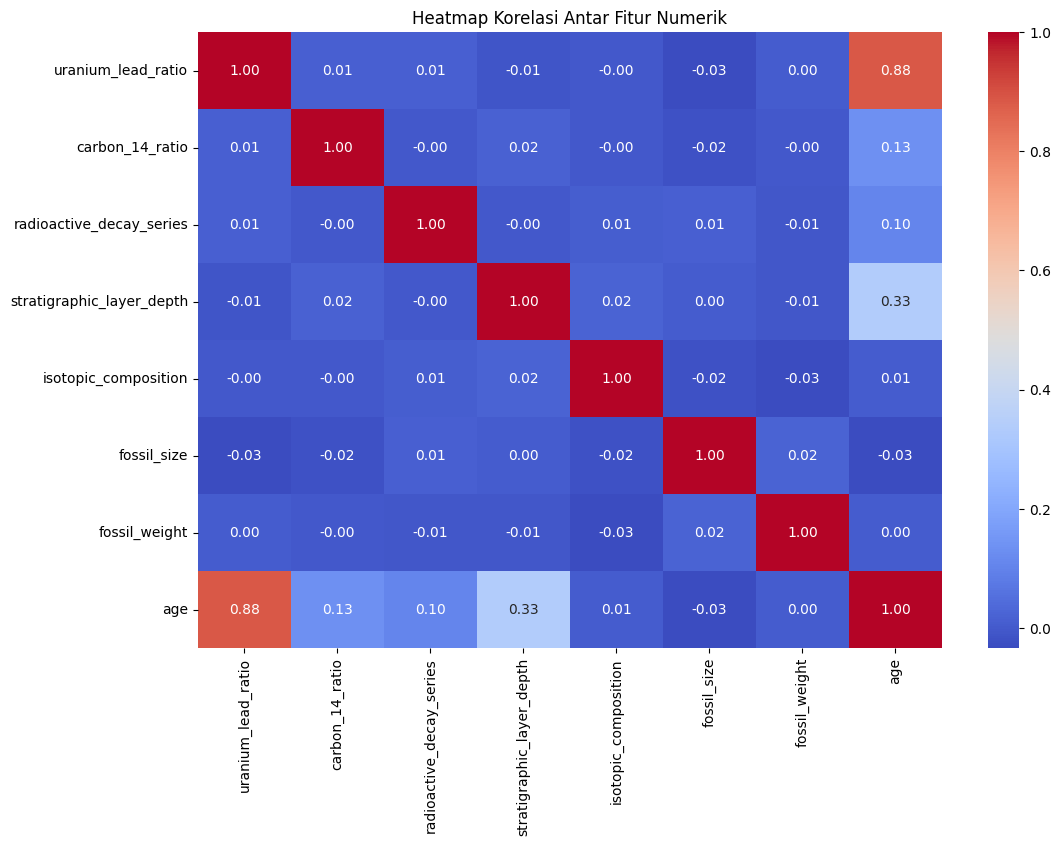

In [29]:
# Korelasi antar fitur numerik
corr_matrix = data[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur Numerik")
plt.show()


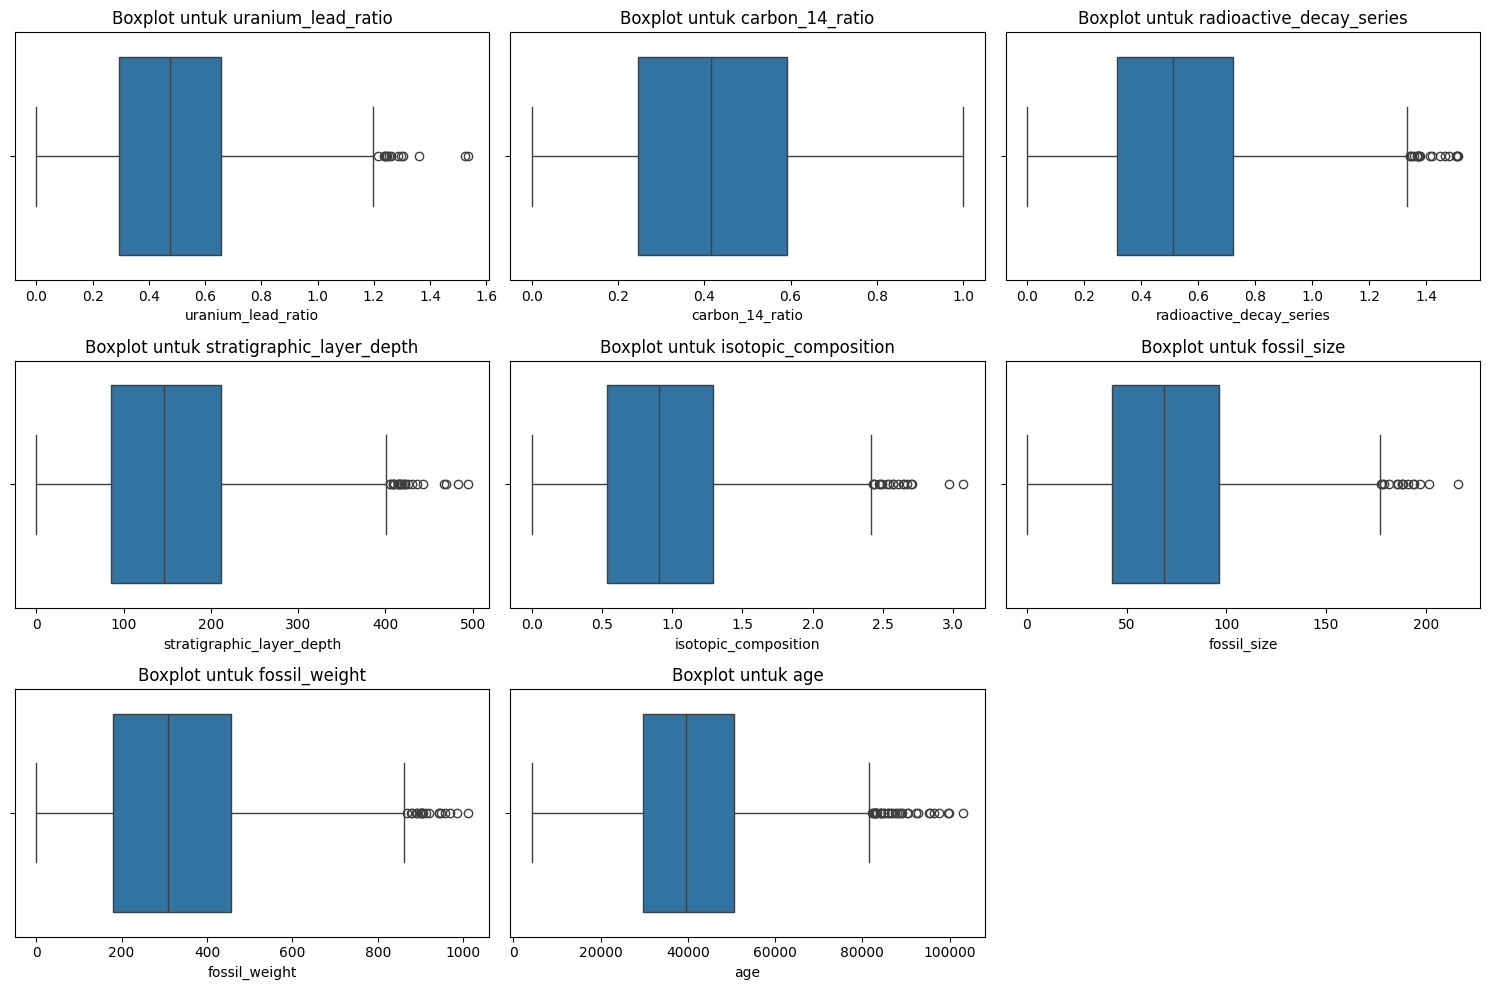

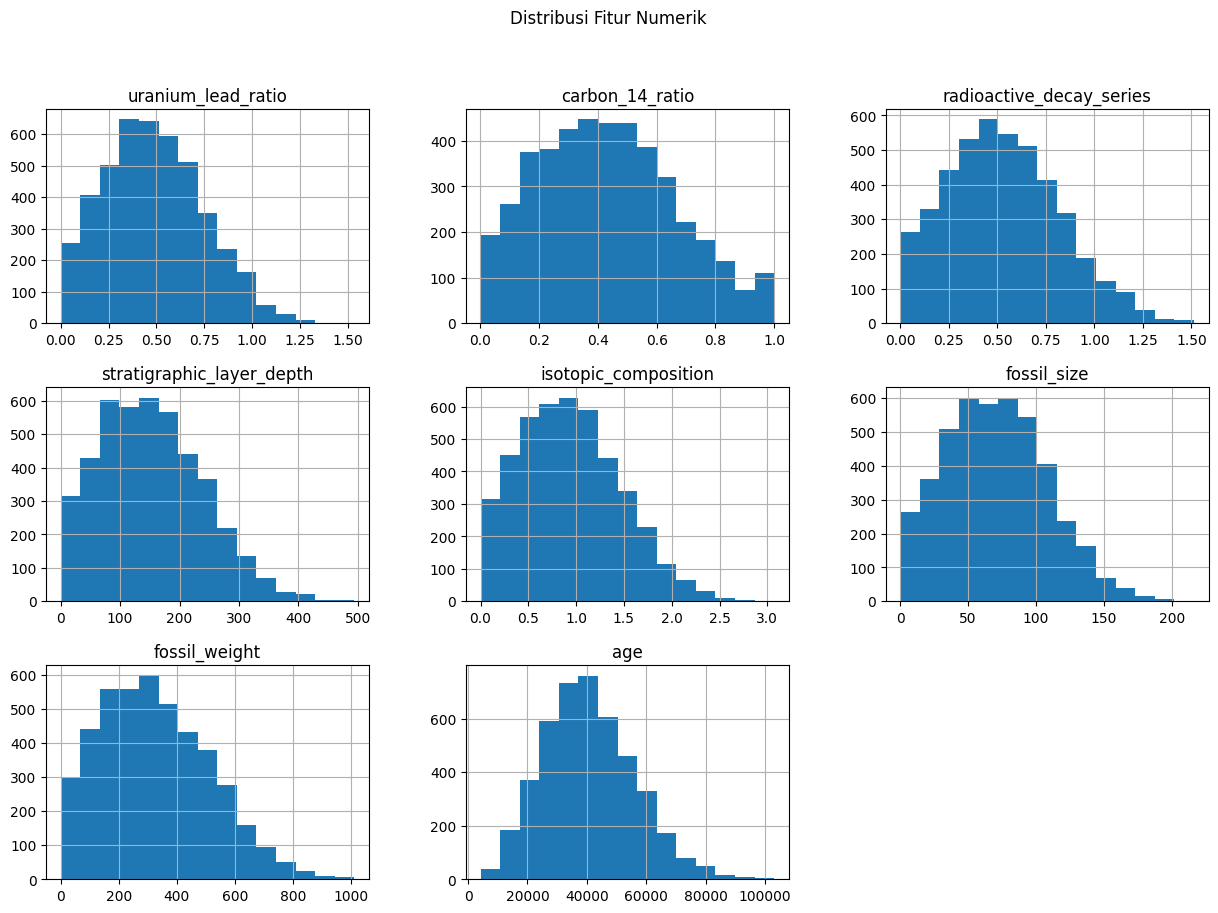

In [30]:
# Boxplot untuk fitur numerik
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot untuk {column}')
plt.tight_layout()
plt.show()

# Histogram untuk fitur numerik
data[numerical_features].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribusi Fitur Numerik')
plt.show()


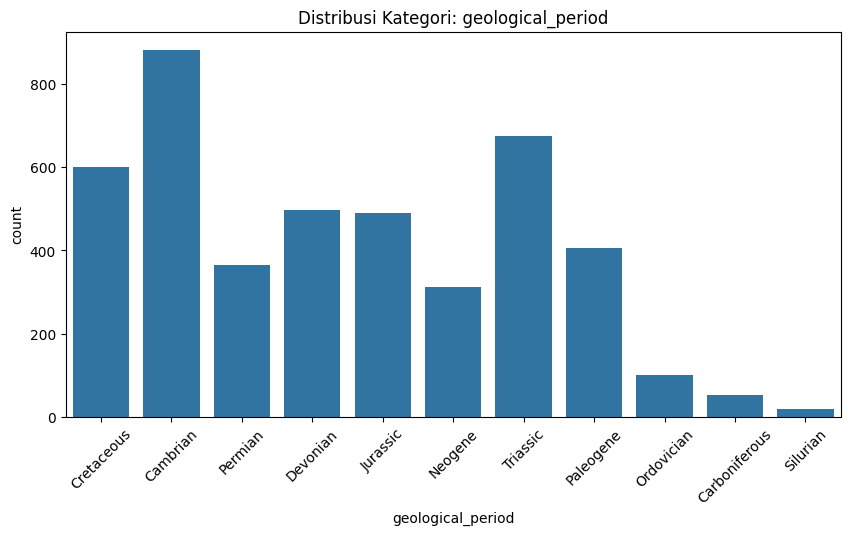

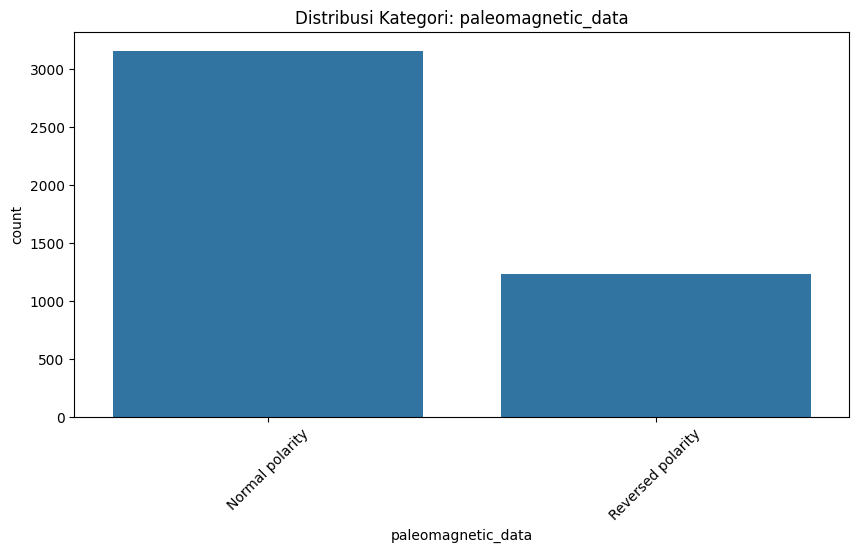

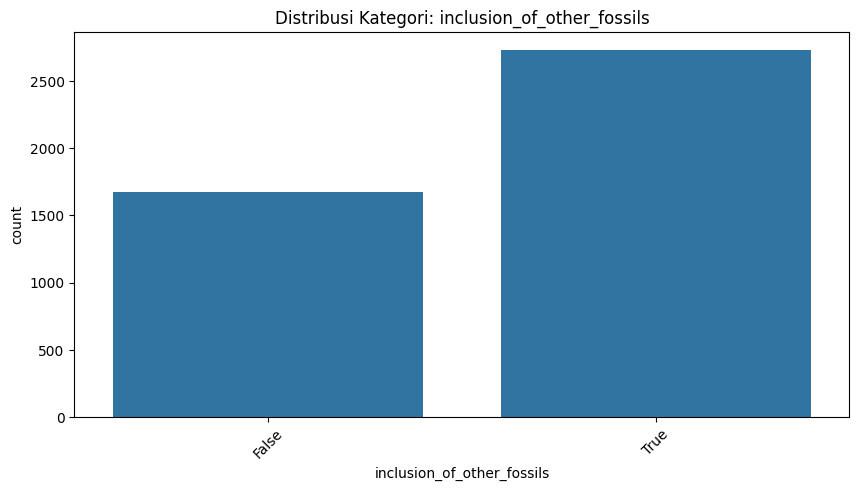

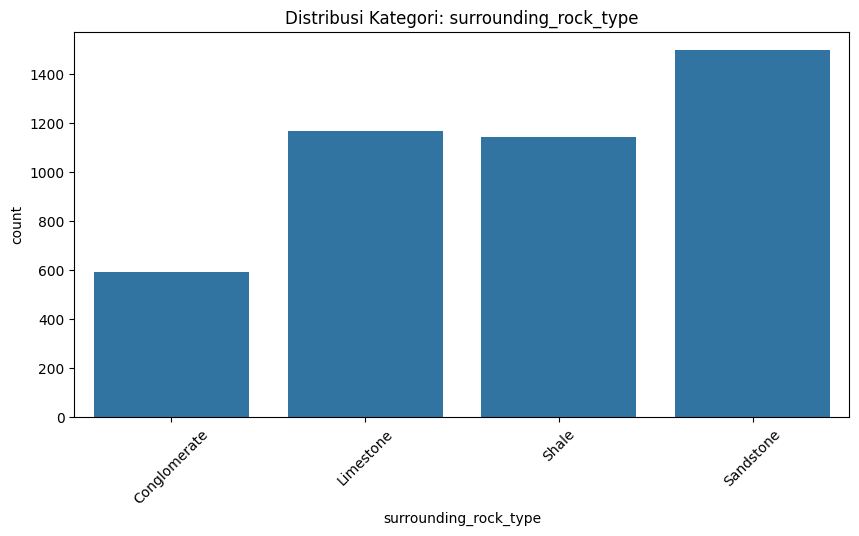

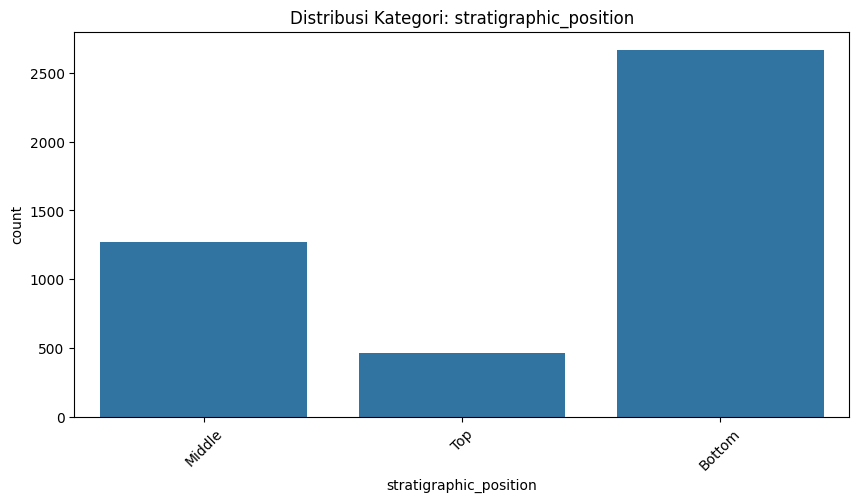

In [31]:
# Visualisasi countplot untuk fitur kategorikal
for column in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=data)
    plt.title(f'Distribusi Kategori: {column}')
    plt.xticks(rotation=45)
    plt.show()

In [35]:
import pandas as pd

# Memeriksa missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Menampilkan missing values dan persentasenya
print("Missing Values dan Persentasenya:\n", pd.DataFrame({'Jumlah': missing_values, 'Persentase': missing_percentage}))

# Menghapus kolom dengan missing values yang sangat banyak (misalnya > 50%)
data_cleaned = data.dropna(axis=1, thresh=int(0.5*len(data)))

# Mengisi missing values di kolom numerik dengan mean
for column in data_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    data_cleaned[column] = data_cleaned[column].fillna(data_cleaned[column].mean())

# Mengisi missing values di kolom kategorikal dengan modus (nilai yang paling sering muncul)
for column in data_cleaned.select_dtypes(include=['object', 'bool']).columns:
    data_cleaned[column] = data_cleaned[column].fillna(data_cleaned[column].mode()[0])

# Verifikasi apakah masih ada missing values
print("Missing values setelah cleansing:\n", data_cleaned.isnull().sum())


Missing Values dan Persentasenya:
                             Jumlah  Persentase
uranium_lead_ratio               0         0.0
carbon_14_ratio                  0         0.0
radioactive_decay_series         0         0.0
stratigraphic_layer_depth        0         0.0
geological_period                0         0.0
paleomagnetic_data               0         0.0
inclusion_of_other_fossils       0         0.0
isotopic_composition             0         0.0
surrounding_rock_type            0         0.0
stratigraphic_position           0         0.0
fossil_size                      0         0.0
fossil_weight                    0         0.0
age                              0         0.0
Missing values setelah cleansing:
 uranium_lead_ratio            0
carbon_14_ratio               0
radioactive_decay_series      0
stratigraphic_layer_depth     0
geological_period             0
paleomagnetic_data            0
inclusion_of_other_fossils    0
isotopic_composition          0
surrounding_rock

In [36]:
# Memeriksa jumlah data duplikat
duplicate_rows = data_cleaned.duplicated().sum()
print("Jumlah data duplikat:", duplicate_rows)

# Menghapus data duplikat
data_cleaned = data_cleaned.drop_duplicates()

# Verifikasi apakah masih ada data duplikat
print("Jumlah data duplikat setelah penghapusan:", data_cleaned.duplicated().sum())


Jumlah data duplikat: 0
Jumlah data duplikat setelah penghapusan: 0


In [37]:
# Menampilkan nilai unik pada kolom kategorikal untuk memeriksa inkonsistensi
for column in data_cleaned.select_dtypes(include=['object', 'bool']).columns:
    print(f"Nilai unik dalam kolom {column}: {data_cleaned[column].unique()}")

# Sebagai contoh, kita bisa mengubah nilai yang berbeda tapi seharusnya sama
# Misalnya, memperbaiki kesalahan ejaan atau perbedaan kapitalisasi
data_cleaned['geological_period'] = data_cleaned['geological_period'].str.strip().str.capitalize()

# Verifikasi nilai unik setelah perbaikan
print("Nilai unik setelah perbaikan:\n", data_cleaned['geological_period'].unique())


Nilai unik dalam kolom geological_period: ['Cretaceous' 'Cambrian' 'Permian' 'Devonian' 'Jurassic' 'Neogene'
 'Triassic' 'Paleogene' 'Ordovician' 'Carboniferous' 'Silurian']
Nilai unik dalam kolom paleomagnetic_data: ['Normal polarity' 'Reversed polarity']
Nilai unik dalam kolom inclusion_of_other_fossils: [False  True]
Nilai unik dalam kolom surrounding_rock_type: ['Conglomerate' 'Limestone' 'Shale' 'Sandstone']
Nilai unik dalam kolom stratigraphic_position: ['Middle' 'Top' 'Bottom']
Nilai unik setelah perbaikan:
 ['Cretaceous' 'Cambrian' 'Permian' 'Devonian' 'Jurassic' 'Neogene'
 'Triassic' 'Paleogene' 'Ordovician' 'Carboniferous' 'Silurian']


Outlier pada kolom uranium_lead_ratio:
       uranium_lead_ratio  carbon_14_ratio  radioactive_decay_series  \
350             1.239090         0.242641                  0.280968   
522             1.243923         0.566514                  0.475528   
665             1.524921         0.196071                  0.324576   
819             1.235496         0.571778                  0.647673   
1054            1.247303         0.916280                  0.883172   
1859            1.259985         0.596875                  1.214623   
2672            1.304201         0.313732                  0.428739   
2863            1.252116         0.213248                  0.543242   
3314            1.533270         0.407010                  0.967435   
3399            1.215105         0.224824                  0.178923   
3427            1.360797         0.740183                  0.622600   
3881            1.286375         0.210910                  0.399022   
4367            1.297106         0.76

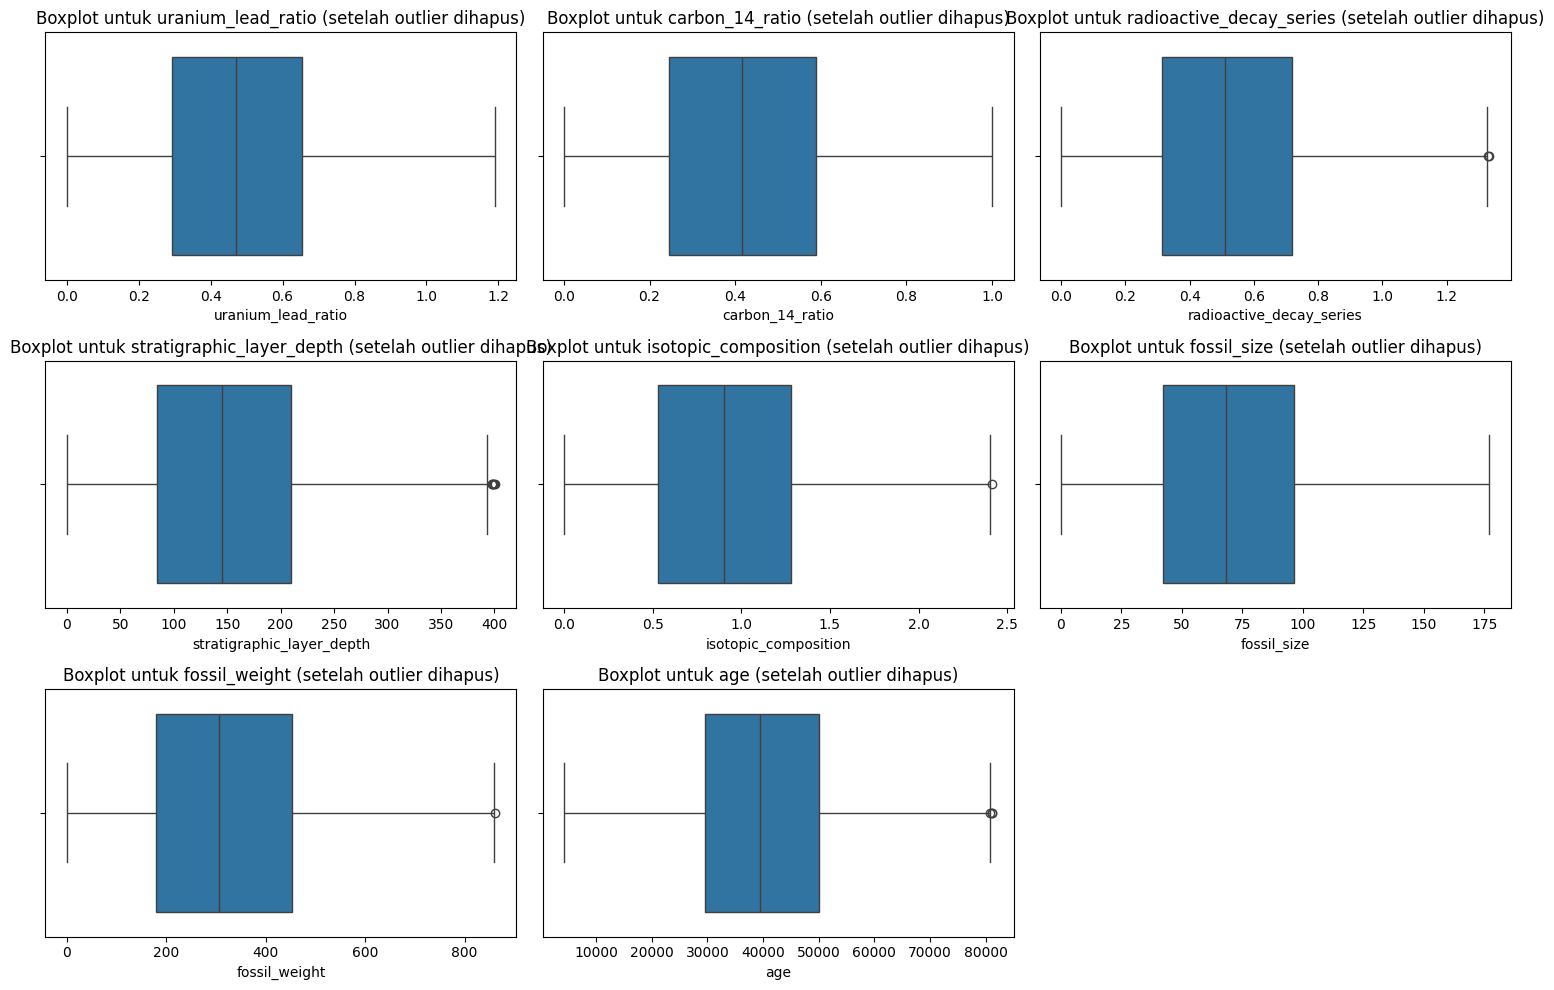

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mengidentifikasi outlier menggunakan IQR (Interquartile Range)
for column in data_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = data_cleaned[column].quantile(0.25)
    Q3 = data_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Menampilkan outlier
    outliers = data_cleaned[(data_cleaned[column] < lower_bound) | (data_cleaned[column] > upper_bound)]
    print(f"Outlier pada kolom {column}:\n", outliers)

    # Menghapus outlier
    data_cleaned = data_cleaned[(data_cleaned[column] >= lower_bound) & (data_cleaned[column] <= upper_bound)]

# Verifikasi apakah masih ada outlier
plt.figure(figsize=(15, 10))
for i, column in enumerate(data_cleaned.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data_cleaned[column])
    plt.title(f'Boxplot untuk {column} (setelah outlier dihapus)')
plt.tight_layout()
plt.show()


In [39]:
# Memeriksa dan mengubah tipe data
# Misalnya, jika ada kolom yang berisi tanggal tapi masih berupa string:
if 'date_column' in data_cleaned.columns:
    data_cleaned['date_column'] = pd.to_datetime(data_cleaned['date_column'], errors='coerce')

# Memeriksa tipe data setelah perubahan
print("Tipe data setelah perubahan:\n", data_cleaned.dtypes)


Tipe data setelah perubahan:
 uranium_lead_ratio            float64
carbon_14_ratio               float64
radioactive_decay_series      float64
stratigraphic_layer_depth     float64
geological_period              object
paleomagnetic_data             object
inclusion_of_other_fossils       bool
isotopic_composition          float64
surrounding_rock_type          object
stratigraphic_position         object
fossil_size                   float64
fossil_weight                 float64
age                             int64
dtype: object


In [40]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in data_cleaned.select_dtypes(include=['object', 'bool']).columns:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

# Memeriksa hasil encoding
print("Data setelah Label Encoding:\n", data_cleaned.head())


Data setelah Label Encoding:
    uranium_lead_ratio  carbon_14_ratio  radioactive_decay_series  \
0            0.738061         0.487707                  0.907884   
1            0.560096         0.341738                  1.121302   
2            0.424773         0.218493                  0.103855   
3            0.349958         0.704649                  0.383617   
4            0.886811         0.777494                  0.593254   

   stratigraphic_layer_depth  geological_period  paleomagnetic_data  \
0                      91.17                  2                   0   
1                     165.44                  0                   0   
2                     218.98                  0                   0   
3                      51.09                  8                   0   
4                     313.72                  3                   0   

   inclusion_of_other_fossils  isotopic_composition  surrounding_rock_type  \
0                           0              0.915951     

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

# Memeriksa hasil scaling
print("Data setelah Scaling (Standardization):\n", data_cleaned.head())


Data setelah Scaling (Standardization):
    uranium_lead_ratio  carbon_14_ratio  radioactive_decay_series  \
0            1.030001         0.251741                  1.347271   
1            0.317171        -0.374648                  2.103032   
2           -0.224860        -0.903519                 -1.499975   
3           -0.524527         1.182689                 -0.509277   
4            1.625812         1.495283                  0.233095   

   stratigraphic_layer_depth  geological_period  paleomagnetic_data  \
0                  -0.710520                  2                   0   
1                   0.173462                  0                   0   
2                   0.810710                  0                   0   
3                  -1.187563                  8                   0   
4                   1.938331                  3                   0   

   inclusion_of_other_fossils  isotopic_composition  surrounding_rock_type  \
0                   -1.275087             -0.

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

# Memeriksa hasil scaling
print("Data setelah Scaling (Min-Max):\n", data_cleaned.head())


Data setelah Scaling (Min-Max):
    uranium_lead_ratio  carbon_14_ratio  radioactive_decay_series  \
0            0.619838         0.487582                  0.681096   
1            0.470331         0.341577                  0.841216   
2            0.356646         0.218303                  0.077862   
3            0.293795         0.704577                  0.287757   
4            0.744802         0.777440                  0.445041   

   stratigraphic_layer_depth  geological_period  paleomagnetic_data  \
0                   0.227407                  2                   0   
1                   0.412924                  0                   0   
2                   0.546660                  0                   0   
3                   0.127292                  8                   0   
4                   0.783309                  3                   0   

   inclusion_of_other_fossils  isotopic_composition  surrounding_rock_type  \
0                         0.0              0.379216  

In [43]:
from sklearn.model_selection import train_test_split

# Memisahkan fitur (X) dan label (y) jika dataset memiliki kolom target
X = data_cleaned.drop('age', axis=1)
y = data_cleaned['age']

# Membagi dataset menjadi training dan testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Memeriksa bentuk dari data training dan testing
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3413, 12)
X_test shape: (854, 12)
y_train shape: (3413,)
y_test shape: (854,)


In [44]:
from sklearn.decomposition import PCA

# Mengurangi dimensi data menjadi 95% dari variansi total
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Memeriksa bentuk data setelah PCA
print("X_train shape setelah PCA:", X_train_pca.shape)
print("X_test shape setelah PCA:", X_test_pca.shape)


X_train shape setelah PCA: (3413, 4)
X_test shape setelah PCA: (854, 4)


In [46]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize models with hyperparameters
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Define hyperparameter grids
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

# Perform hyperparameter tuning using RandomizedSearchCV
best_models = {}
for model_name, model in models.items():
    random_search = RandomizedSearchCV(model, param_grids[model_name], cv=3, scoring='r2', n_jobs=-1, n_iter=10, random_state=42)
    random_search.fit(X_train, y_train)
    best_models[model_name] = random_search.best_estimator_

# Display the best hyperparameters
for model_name, model in best_models.items():
    print(f"Best parameters for {model_name}:")
    print(model.get_params())
    print()

# Evaluate the best models on test data
for model_name, model in best_models.items():
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    print(f"Evaluation results for {model_name}:")
    print(f"  MAE: {mae:.2f}")
    print(f"  MSE: {mse:.2f}")
    print(f"  R2 Score: {r2:.3f}")
    print()


Best parameters for Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Best parameters for Gradient Boosting:
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

Evaluation results for Random Forest:
  MAE: 0.02
  MSE: 0.00
  R2 Score: 0.973

Evaluation r

In [52]:
import pickle
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Misalnya data sudah ada dalam variabel X dan y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definisikan dan latih model Random Forest
rf_model = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error', max_depth=20, 
                                 max_features=1.0, min_samples_leaf=1, min_samples_split=2, 
                                 n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

# Definisikan dan latih model Gradient Boosting
gb_model = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse', learning_rate=0.1, 
                                     loss='squared_error', max_depth=3, n_estimators=300, random_state=42)
gb_model.fit(X_train, y_train)

# Simpan model Random Forest ke file menggunakan pickle
rf_pickle_path = 'random_forest_model.pkl'
with open(rf_pickle_path, 'wb') as f:
    pickle.dump(rf_model, f)

# Simpan model Gradient Boosting ke file menggunakan pickle
gb_pickle_path = 'gradient_boosting_model.pkl'
with open(gb_pickle_path, 'wb') as f:
    pickle.dump(gb_model, f)

print("Random Forest dan Gradient Boosting models telah disimpan dengan sukses!")


Random Forest dan Gradient Boosting models telah disimpan dengan sukses!
